In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns 

dfUser         = pd.read_csv("../applicant_material/user.csv") 
dfJobs         = pd.read_csv("../applicant_material/job_desc.csv") 

#dfUser.columns = dfUser.columns.str.replace(r"[v]", "")
#column_names   = ['has_applied'] +  [str(entry) for entry in range(1,57)]
#dfUser         = dfUser.reindex(columns=column_names)
dfAll          = pd.concat([dfUser, dfJobs], axis=1)


dfJobs.job_title_full = dfJobs.job_title_full.str.replace('(', ' ')
dfJobs.job_title_full = dfJobs.job_title_full.str.replace(')', ' ')
dfJobs.job_title_full = dfJobs.job_title_full.str.lower();

In [2]:
dfUser.head()

,user_id,has_applied,v1,v10,v11,v12,v13,v14,v15,v16,...,v51,v52,v53,v54,v55,v56,v6,v7,v8,v9
0,U1,1,0.620573,0.018662,0.100803,0.080898,0.420417,0.817681,0.147355,0.446812,...,0.227104,0.811505,0.945988,0.798489,0.148969,0.707921,0.751510,0.349078,0.337132,0.807632
1,U2,1,0.972502,0.870277,0.504887,0.995163,0.179480,0.608719,0.245085,0.851246,...,0.855074,0.683701,0.318416,0.703566,0.400617,0.563469,0.989583,0.073514,0.095885,0.890821
2,U3,1,0.240756,0.546440,0.521399,0.402420,0.640444,NaN,0.184515,0.395058,...,0.614898,0.487564,0.256930,0.653874,0.761972,0.976820,0.264505,0.513135,0.978387,0.620669
3,U4,1,0.004854,0.433188,0.250801,0.242680,0.713586,0.210186,0.977472,0.375024,...,0.407412,0.242282,0.097724,0.191388,0.516972,0.742984,0.232344,0.305115,0.080069,0.297233
4,U5,1,0.835250,0.476812,0.764354,0.449753,0.524924,0.807181,0.294023,0.475043,...,0.605605,0.772735,0.351836,0.932708,0.724384,0.123647,0.091980,0.581444,0.093941,0.612623


## Correlation

has_applied    1.000000
v1             0.024147
v10           -0.017162
v11           -0.030218
v12            0.011672
Name: has_applied, dtype: float64

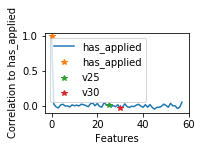

In [3]:
corrTo_has_applied = dfAll.corr().iloc[0,:]
fig,ax = plt.subplots(figsize=(3,2))
plt.plot(range(0,58),corrTo_has_applied[0:])
plt.plot(corrTo_has_applied[0],'*C1', label = 'has_applied')
plt.plot(25,corrTo_has_applied[25],'*C2', label = 'v25')
plt.plot(30,corrTo_has_applied[30],'*C3', label = 'v30')
plt.legend()

plt.ylabel('Correlation to has_applied')
plt.xlabel('Features',)
ax.tick_params(axis="x")
plt.tight_layout()
plt.savefig('results/correlation.pdf')
corrTo_has_applied.head()

### Heatmap cross-correlation

In [4]:
## Plot heatmap for cross-correlation
plt.figure(figsize = (10,8))
g = sns.heatmap(dfAll.corr(),annot=False, fmt = ".2f", cmap = "coolwarm",linewidths= 0.01)
plt.savefig('results/correlation_Seaborn.pdf')
dfAll.corr()
plt.close()

## Histograms features users

user_id


NameError: name 'bins' is not defined

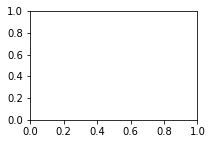

In [5]:
fig,ax = plt.subplots(figsize = (3,2))
for column in dfUser[:]:
    try:
        freqs,bins = np.histogram(dfUser[column],range = (0,1), density = True)
    except TypeError:
        print(column)
        pass
    if column == 'has_applied':
        plt.plot(bins[1:],freqs, '*',label = column)
    elif column == '1':
        plt.plot(bins[1:],freqs, label = 'v1...')
    elif column == '56':
        plt.plot(bins[1:],freqs, label = '...v56')
    else:
        plt.plot(bins[1:],freqs)
plt.legend(ncol = 1, loc = 'upper center')
plt.ylabel('Histogram (normalized)')
plt.xlabel('Value (raw data)')
plt.tight_layout()
plt.savefig('results/pdfsOfFeatures.pdf')
plt.show()
plt.close()


In [ ]:
##Plot Only v25 und v30

fig,ax     = plt.subplots(figsize = (3,2))
freqs,bins = np.histogram(dfUser['has_applied'],range = (0,1), density = True)
plt.plot(bins[1:],freqs, '*',label = 'has_applied',)

freqs,bins = np.histogram(dfUser['25'],range = (0,1), density = True)
plt.plot(bins[1:],freqs, label = 'v25')
freqs,bins = np.histogram(dfUser['30'],range = (0,1), density = True)
plt.plot(bins[1:],freqs, label = 'v30')


plt.legend(ncol = 1, loc = 'upper center')
plt.ylabel('Histogram (normalized)')
plt.xlabel('Value (raw data)')
plt.tight_layout()
#plt.savefig('results/pdfsOfFeatures.pdf')
plt.show()
plt.close()



#### Balance TargetVariable

In [ ]:
fig,ax = plt.subplots(figsize = (3,2))

ax = (pd.Series(dfUser.has_applied).value_counts(normalize=True, sort=False)).plot.bar()
#for i, v in enumerate(np.asarray(dfUser.has_applied.value_counts(normalize=True, sort=False))):
#    ax.text(v*0.3, i/3+0.3, str(v), color='k', fontweight='bold')
plt.xlabel('Conversion rate')
plt.ylabel('Probability')
plt.tight_layout()
plt.savefig('BalanceTargetVariable.pdf')
plt.show()

##https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group

## Clean data

In [ ]:
#Remove str
#dfUser.user_id =  dfUser.user_id.apply(lambda x : int(x[1:]))
#dfJobs.user_id = dfJobs.user_id.apply(lambda x : int(x[1:]))

#Fill nan with mean
#dfUserNoNan = dfUser.apply(lambda x: x.fillna(x.mean()),axis=0)

#Fill nan with U (0,1)
dfUserNoNan = dfUser.mask(dfUser.isnull(), np.random.uniform(0, 1, size=dfUser.shape))
dfUserNoNan.head()

## Kullback-Leibler divergence

In [ ]:
import scipy.stats

dfUser_Dropna25 = dfUser
dfUser_Dropna30 = dfUser

dfUser_Dropna25.dropna(subset= ['has_applied','25'], inplace=True)
dfUser_Dropna30.dropna(subset = ['has_applied','30','1'], inplace=True)



entropies = []
for column in dfUserNoNan:
    entropies.append(scipy.stats.entropy(dfUserNoNan.has_applied,dfUserNoNan[column]))
    if entropies[-1] < 0.7:
        print('Column smaller than 0.7', column)

#Calc uniform reference value
entropyUniform    = np.mean([scipy.stats.entropy(dfUserNoNan.has_applied,np.random.uniform(size=2000)) for i in range(50)])
entropyUniformStd = np.std([scipy.stats.entropy(dfUserNoNan.has_applied,np.random.uniform(size=2000)) for i in range(50)])


entropy25 = scipy.stats.entropy(dfUser_Dropna25.has_applied,dfUser_Dropna25['25'])
entropy30 = scipy.stats.entropy(dfUser_Dropna30.has_applied,dfUser_Dropna30['30'])
entropy1 = scipy.stats.entropy(dfUser_Dropna30.has_applied,dfUser_Dropna30['1'])


print(entropy25)
print(entropy30,entropy1)

#Plotting
fig,ax = plt.subplots(figsize = (4,2.6))
plt.plot(range(1,57),entropies[1:], label = 'Kullback-Leibler \n divergence')
plt.fill_between(range(len(entropies[1:])), entropyUniform-entropyUniformStd, entropyUniform+entropyUniformStd, color = '0.75', label = 'U(0,1) Std.Dev.')
plt.plot(range(len(entropies[2:])),np.ones(len(entropies[2:]))*entropyUniform, '--',color = 'k',label = 'U(0,1)')
#plt.plot(18,entropy25)
#plt.plot(23,entropy30, markersize = 15)
plt.ylim([-0.05,1])
plt.legend()
plt.tick_params(axis="x")
plt.xlabel('Feature')
plt.ylabel('Kullback-Leibler to CR')
plt.tight_layout()
plt.savefig('results/entropies.pdf')

# Jobs Data Frame - prescriptive inferences?

In [ ]:
dfJobs['has_applied']  = dfUser['has_applied']
dfJobs['Salary_Bool']  = np.where(dfJobs.salary.notnull(), 1, 0)
#dfJobs                 = pd.get_dummies(dfJobs, columns=['job_title_full'])  


In [ ]:
#dfAll.groupby('has_applied').sum()
dfJobs.groupby('has_applied').mean()

### Look for keywords

In [ ]:
def AddBinaryString(df,ListOfStrings):
    for string in ListOfStrings:
            dfJobs['Contains_'+string] = dfJobs['job_title_full'].str.find(string)
            dfJobs['Contains_'+string] = np.where(dfJobs['Contains_'+string]>-1.,1,0)
    return(dfJobs)

from collections import Counter
ListOfMostCommonWords = Counter(" ".join(dfJobs["job_title_full"]).split()).most_common(None)

ListOfStrings = [entry for entry, count in ListOfMostCommonWords if count > 0]
print(ListOfMostCommonWords)
print(ListOfStrings)

#ListOfStrings            = ['Manager','Junior','Senior', 'Lead', 'Remote', 'M/F', 'Backend','Analyst']
dfJobs                   = AddBinaryString(dfJobs,ListOfStrings)


### Group keywords by target: Individual check

In [ ]:
SampleMean = dfJobs.has_applied.mean()
print(SampleMean)

for entry, count in ListOfMostCommonWords:
    mean        = dfJobs.groupby(by='Contains_'+entry).has_applied.mean()[1]
    errorOfMean = np.sqrt(0.576*(1-0.5764)) / np.sqrt(count)
    relError = (mean -SampleMean)/errorOfMean
    
    if True:# abs(relError*count/2000) > 0.1:
        print(entry, '\t', 'Mean: {0:.3f}'.format(mean), '\t','Error of Mean: {0:.3f}'.format(errorOfMean),'\t Dev of mean: {0:.2f}'.format(mean-SampleMean), 
              '\t','Count: ',count, 'RelError {0:.2f}'.format(relError))
        #print(entry, relError*count/2000)
        

### Heatmap  Correlation one-hot encoded Keywords

In [ ]:
plt.figure(figsize = (10,8))
g = sns.heatmap(dfJobs.corr(),annot=False, fmt = ".2f", cmap = "coolwarm",linewidths= 0.01)
plt.savefig('results/correlationKEYWORDS100Describptions_Seaborn.pdf')
dfJobs.corr()

### Kullback Leibler for keywords

In [ ]:
import scipy.stats


entropies = []
for column in dfJobs:
    try:
        entropies.append(scipy.stats.entropy(dfJobs.has_applied,dfJobs[column]))
    except:
        TypeError


#Calc uniform reference value
entropyUniform    = np.mean([scipy.stats.entropy(dfJobs.has_applied,np.random.uniform(size=2000)) for i in range(50)])
entropyUniformStd = np.std([scipy.stats.entropy(dfJobs.has_applied,np.random.uniform(size=2000)) for i in range(50)])



print(entropies)

#Plotting
fig,ax = plt.subplots(figsize = (4,2.6))
plt.plot(entropies[1:], label = 'Kullback-Leibler \n divergence')
plt.fill_between(range(len(entropies[1:])), entropyUniform-entropyUniformStd, entropyUniform+entropyUniformStd, color = '0.75', label = 'U(0,1) Std.Dev.')
plt.plot(range(len(entropies[2:])),np.ones(len(entropies[2:]))*entropyUniform, '--',color = 'k',label = 'U(0,1)')
plt.ylim([-0.05,1])
plt.legend()
plt.tick_params(axis="x")
plt.xlabel('Feature')
plt.ylabel('Kullback-Leibler to has_applied')
plt.tight_layout()
plt.savefig('results/entropiesJobs.pdf')

### Conversation rate per keywords/company/salary

In [ ]:
print(dfJobs.columns)

conversionRateList = []

for column in dfJobs.drop(['user_id', 'job_title_full'], axis = 1):
    conversionRate = dfJobs.groupby(by = column).has_applied.mean()
    conversionRateList.append( [column, conversionRate ])
    

dfConversionRateList = pd.DataFrame(conversionRateList, columns = ['Name', 'conversionRate']) 

for column, rate in conversionRateList:
    print(column,rate);
    
#plt.plot(dfConversionRateList)
dfConversionRateList.head();

### Plot Company CR

In [ ]:
fig, ax = plt.subplots(figsize = (3,2))
N       = dfJobs[['has_applied', 'company']].groupby('company').count()['has_applied']
stdsum  =  np.sqrt(0.576*(1-0.576))/np.sqrt(N) 

ax      = pd.Series((dfJobs.groupby(by = 'company').has_applied).value_counts(normalize=True, sort=False)[:,1]).plot.bar(yerr=stdsum)
plt.ylabel('Conversion rate')
plt.axhline(0.576,color = 'k',linestyle = '--')
plt.axhline(0.576,color = 'k',linestyle = '--')
plt.tight_layout()
fig.savefig('results/PlotCompany.pdf')

### Plot barplot State Salary

In [ ]:
fig, ax = plt.subplots(figsize = (3,2.5))
N       = dfJobs[['has_applied', 'Salary_Bool']].groupby('Salary_Bool').count()['has_applied']
stdsum  =  np.sqrt(0.576*(1-0.576))/np.sqrt(N) 

ax      = pd.Series((dfJobs.groupby(by = 'Salary_Bool').has_applied).value_counts(normalize=True, sort=False)[:,1]).plot.bar(yerr=stdsum)
plt.ylabel('Conversion rate')
plt.axhline(0.576,color = 'k',linestyle = '--')
plt.axhline(0.576,color = 'k',linestyle = '--')
plt.xticks([0,1],['NaN', 'Salary'])

plt.tight_layout()
fig.savefig('results/BarplotSalaryBool.pdf')


### CR for single category of a feature - are there popular jobs ?!

In [ ]:
from statistics import median
from statistics import stdev

def SimulateBinomialDistr():
    randList   = np.random.uniform(10,24,100)
    sList      = []
    freqThList = []
    for i, N in enumerate(randList):
        a = np.random.binomial(N, 0.576, 156)/N
        sList.append( a)
        freqTh, binsTh = np.histogram(a, bins = np.arange(11)/10, density = False)
        freqThList.append(freqTh)

    freqThList = np.asarray(freqThList)

    freqTh     = np.zeros(10)
    freqThStd  = np.zeros(10) 
    for i in range(10):
        freqTh[i]    = np.mean(freqThList[:,i])
        freqThStd[i] = np.std(freqThList[:,i])
    where_are_NaNs = np.isnan(freqTh)
    freqTh[where_are_NaNs] = 0
    return(freqTh, freqThStd,binsTh)





column = 'job_title_full'

conversionRate = dfJobs.groupby(by = column).has_applied.mean()
    
conversionRate.head()

freq, bins     = np.histogram(conversionRate, bins = np.arange(11)/10, density = False)
freqTh, freqThStd,binsTh = SimulateBinomialDistr()

##Plotting
fig, ax = plt.subplots(figsize = (5,3.5))
plt.bar(bins[1:],freq,width = 1/10, label = 'Data', alpha = 0.9)
plt.plot(binsTh[1:],freqTh, color = 'C1', label = 'MC Simulation \nBinomial Distr')
plt.fill_between(binsTh[1:],freqTh + freqThStd, freqTh - freqThStd, label = 'MC Simulation \nStd Dev ', color = '0.75')
plt.axvline(median(conversionRate), color = 'k', linestyle = '--', label = 'Median Data')

plt.title('Distribution of CR for each job')
plt.ylabel('Counts')
plt.xlabel('Conversion rate')
plt.ylim([-1.5,68.5])
plt.xlim([-0.05,1.05])
plt.legend(loc = 'upper left')
plt.savefig('results/popularJobs.pdf')
print(bins)
